In [1]:
testdata = '389125467'

inputdata = '962713854'

In [2]:
class Cupcircle(object):
    def __init__(self, data):
        self.circle = [int(c) for c in data]
        self.current = 0

    def translate(self, correction):
        self.circle = self.circle + list(range(max(self.circle) + 1, correction + 1))

    def __repr__(self):
        return ', '.join([f'{c}' if i != self.current else f'({c})' for i, c in enumerate(self.circle)])

    def result(self):
        pivot = self.circle.index(1)
        return ''.join([str(self.circle[(pivot + i + 1) % len(self.circle)]) for i in range(len(self.circle) - 1)])

    def result2(self):
        pivot = self.circle.index(1)
        return self.circle[(pivot + 1) % len(self.circle)] * self.circle[(pivot + 2) % len(self.circle)]

    def step1_pickup(self):
        picked_up = [self.circle[(self.current + i) % len(self.circle)] for i in range(1,4)]
        if self.current >= len(self.circle) - (3 + 1): # Coming towards the end of the list
            if self.current == len(self.circle) - (3 + 1):
                self.circle = self.circle[:self.current + 1]
            else: # The removed cups straddle the end and beginning of the list
                self.circle = self.circle[(self.current + 3 + 1) % len(self.circle):self.current + 1]
                self.current -= (self.current + 1) % len(self.circle) # The new circle is three shorter
        else:
            self.circle = self.circle[:self.current + 1] + self.circle[self.current + 3 + 1:]
        return picked_up

    def step2_insert(self, picked_up):
        destination = self.circle[self.current] - 1
        while destination not in self.circle:
            destination -= 1
            if destination < min(self.circle):
                destination = max(self.circle)
        idx = self.circle.index(destination) + 1
        self.circle[idx:idx] = picked_up
        if idx <= self.current:
            self.current += 3
        self.current = (self.current + 1) % len(self.circle)
        return destination

    def play(self, moves):
        record = []
        for m in range(1, moves + 1):
            print(f'-- move {m} --')
            # print(f'cups: {self}')
            current_c = self.circle[self.current]
            picked_up = self.step1_pickup()
            print(f'pick up: {", ".join(map(str, picked_up))}')
            destination = self.step2_insert(picked_up)
            print(f'destination: {destination}')
            print()
            record.append((m, current_c, destination))
        return record

In [3]:
cc = Cupcircle(testdata)
cc.play(100)
print(cc.result())

-- move 1 --
pick up: 8, 9, 1
destination: 2

-- move 2 --
pick up: 8, 9, 1
destination: 7

-- move 3 --
pick up: 4, 6, 7
destination: 3

-- move 4 --
pick up: 9, 1, 3
destination: 7

-- move 5 --
pick up: 6, 7, 9
destination: 3

-- move 6 --
pick up: 3, 6, 7
destination: 9

-- move 7 --
pick up: 3, 6, 7
destination: 8

-- move 8 --
pick up: 5, 8, 3
destination: 1

-- move 9 --
pick up: 7, 4, 1
destination: 5

-- move 10 --
pick up: 7, 4, 1
destination: 3

-- move 11 --
pick up: 3, 7, 4
destination: 6

-- move 12 --
pick up: 9, 2, 6
destination: 8

-- move 13 --
pick up: 7, 4, 5
destination: 2

-- move 14 --
pick up: 9, 2, 7
destination: 6

-- move 15 --
pick up: 5, 6, 9
destination: 3

-- move 16 --
pick up: 7, 1, 3
destination: 9

-- move 17 --
pick up: 6, 9, 7
destination: 4

-- move 18 --
pick up: 3, 8, 4
destination: 9

-- move 19 --
pick up: 9, 3, 8
destination: 5

-- move 20 --
pick up: 7, 2, 5
destination: 3

-- move 21 --
pick up: 3, 7, 2
destination: 8

-- move 22 --
pick up:

In [4]:
cc = Cupcircle(testdata)
cc.translate(100)
record = cc.play(10000)
print(cc.result2())
# cc



p: 49, 95, 78
destination: 10

-- move 9622 --
pick up: 52, 14, 19
destination: 7

-- move 9623 --
pick up: 93, 20, 97
destination: 32

-- move 9624 --
pick up: 74, 67, 42
destination: 23

-- move 9625 --
pick up: 92, 32, 93
destination: 75

-- move 9626 --
pick up: 97, 55, 61
destination: 19

-- move 9627 --
pick up: 64, 22, 96
destination: 5

-- move 9628 --
pick up: 16, 90, 86
destination: 49

-- move 9629 --
pick up: 38, 72, 31
destination: 3

-- move 9630 --
pick up: 15, 28, 99
destination: 44

-- move 9631 --
pick up: 17, 39, 77
destination: 28

-- move 9632 --
pick up: 18, 70, 1
destination: 72

-- move 9633 --
pick up: 3, 38, 72
destination: 83

-- move 9634 --
pick up: 70, 1, 31
destination: 17

-- move 9635 --
pick up: 85, 68, 58
destination: 34

-- move 9636 --
pick up: 59, 75, 92
destination: 12

-- move 9637 --
pick up: 93, 98, 23
destination: 31

-- move 9638 --
pick up: 67, 42, 12
destination: 73

-- move 9639 --
pick up: 75, 92, 66
destination: 58

-- move 9640 --
pick 

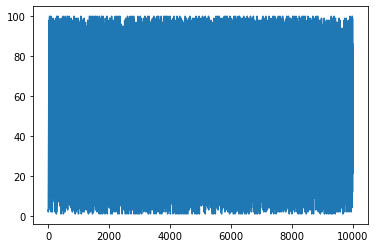

In [5]:
import matplotlib.pyplot as plt
x = [m for m, _, _ in record]
y1 = [c for _, c, _ in record]
y2 = [d for _, _, d in record]
plt.plot(x, y1)
# fig = plt.figure()
# ax = fig.add_axes([0,0,200,20])
# ax.plot(x, y1)
# ax.plot(x, y2)
plt.show()

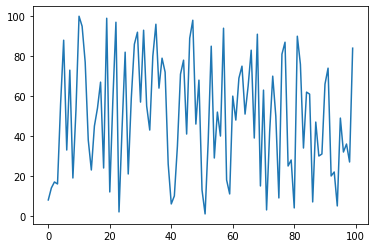

51 [1, 37, 85, 29, 52, 40, 94, 18, 11, 60]


In [6]:
plt.plot(range(len(cc.circle)), cc.circle)
plt.show()
one_index = cc.circle.index(1)
print(one_index, cc.circle[one_index:one_index+10])
